<a href="https://colab.research.google.com/github/shivam-S-bisht/ml-basics/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

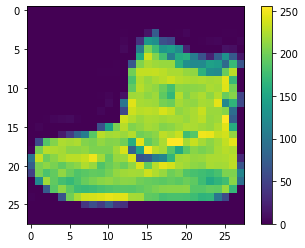

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
#simple way to normalize

train_images = train_images / 255.0
test_images = test_images / 255.0

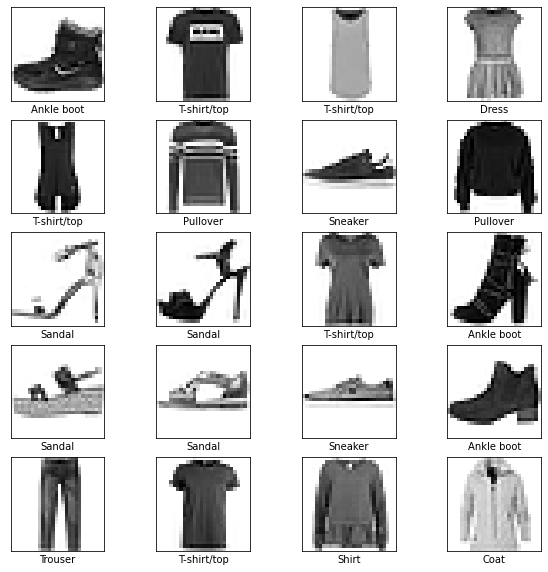

In [0]:
#displaying 20 images
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(5, 4, i+1) # 5x4 = 20 plots
    plt.xticks([]) #for not showing the x axis labels
    plt.yticks([]) #for not showing the y axis labels
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [0]:
# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape = (28, 28)))
# model.add(keras.layers.Dense(units = 128, activation = 'relu'))
# model.add(keras.layers.Dense(units = 10))

#or we can also do like
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = 'relu'), keras.layers.Dense(10)])

In [0]:
#compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1927 - accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1891 - accuracy: 0.9291
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1835 - accuracy: 0.9311
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1789 - accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1754 - accuracy: 0.9342
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - accuracy: 0.9364
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9380
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1610 - accuracy: 0.9393
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1558 - accuracy: 0.9413
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.154

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8849


In [0]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [0]:
predictions = prob_model(test_images)

In [0]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.0639259e-11, 1.4189548e-15, 1.1547061e-13, 2.8195609e-15,
       4.1815980e-14, 1.4079416e-04, 9.6465084e-15, 5.4740615e-04,
       5.5537536e-11, 9.9931180e-01], dtype=float32)>

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

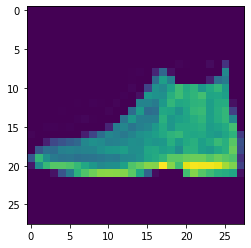

In [0]:
plt.imshow(test_images[0])
plt.show()